In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import validation_curve
import itertools
from sklearn.metrics import precision_recall_fscore_support as reqd_score

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.shape

(1372, 5)

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Question 1

In [6]:
df['color'] = [('green') if val == 0 else ('red') for val in df['class']]
df['sign'] = [('+') if val == 0 else ('-') for val in df['class']]

In [7]:
df.head()

,variance,skewness,curtosis,entropy,class,color,sign
0,3.62160,8.6661,-2.8073,-0.44699,0,green,+
1,4.54590,8.1674,-2.4586,-1.46210,0,green,+
2,3.86600,-2.6383,1.9242,0.10645,0,green,+
3,3.45660,9.5228,-4.0112,-3.59440,0,green,+
4,0.32924,-4.4552,4.5718,-0.98880,0,green,+


In [8]:
df_green = df[df['color'] == 'green']
df_red = df[df['color'] == 'red']
df_plus = df[df['sign'] == '+']
df_minus = df[df['sign'] == '-']

In [9]:
cols = ['variance', 'skewness', 'curtosis', 'entropy']

In [10]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495


In [11]:
df_green[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
variance,762.0,2.276686,2.019348,-4.2859,0.883345,2.553100,3.884450,6.8248
skewness,762.0,4.256627,5.138792,-6.9321,0.450063,5.668800,8.691975,12.9516
curtosis,762.0,0.796718,3.239894,-4.9417,-1.709700,0.700605,2.652925,8.8294
entropy,762.0,-1.147640,2.125077,-8.5482,-2.228250,-0.552380,0.423257,2.4495


In [12]:
df_red[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
variance,610.0,-1.868443,1.881183,-7.0421,-3.061450,-1.806100,-0.541770,2.3917
skewness,610.0,-0.993576,5.404884,-13.7731,-5.810025,0.172775,3.189275,9.6014
curtosis,610.0,2.148271,5.261811,-5.2861,-1.357500,0.373720,5.626350,17.9274
entropy,610.0,-1.246641,2.070984,-7.5887,-2.458375,-0.661650,0.341790,2.1353


In [13]:
%%html
<style>
table {float: left}
</style>

In [14]:
# Rounded the results to 2 decimal places and summarized them in a table below

<table float: left>
    <tr><th> class <th><th> mean(f1) <th><th> std(f1) <th><th> mean(f2) <th><th> std(f2) <th><th> mean(f3) <th><th> std(f3) <th><th> mean(f4) <th><th> std(f4)<th><tr>
    <tr><td> 0 <td><td> 2.28 <td><td> 2.02 <td><td> 4.26 <td><td> 5.14 <td><td> 0.80 <td><td> 3.24 <td><td> -1.15 <td><td> 2.13 <td><tr>
    <tr><td> 1 <td><td> -1.87 <td><td> 1.90 <td><td> -1.00 <td><td> 5.40 <td><td> 2.15 <td><td> 5.30 <td><td> -1.25 <td><td> 2.07 <td><tr>
    <tr><td> all <td><td> 0.44 <td><td> 2.84 <td><td> 1.92 <td><td> 5.87 <td><td> 1.40 <td><td> 4.31 <td><td> -1.19 <td><td> 2.10 <td><tr>
<table>

## Question 2

In [15]:
x_train = df.sample(frac = 0.5)
x_testing = df.drop(x_train.index)

In [16]:
print(x_train.shape)
print(x_testing.shape)

(686, 7)
(686, 7)


In [17]:
x_train_good = x_train[x_train['class'] == 0]
x_train_bad = x_train[x_train['class'] == 1]

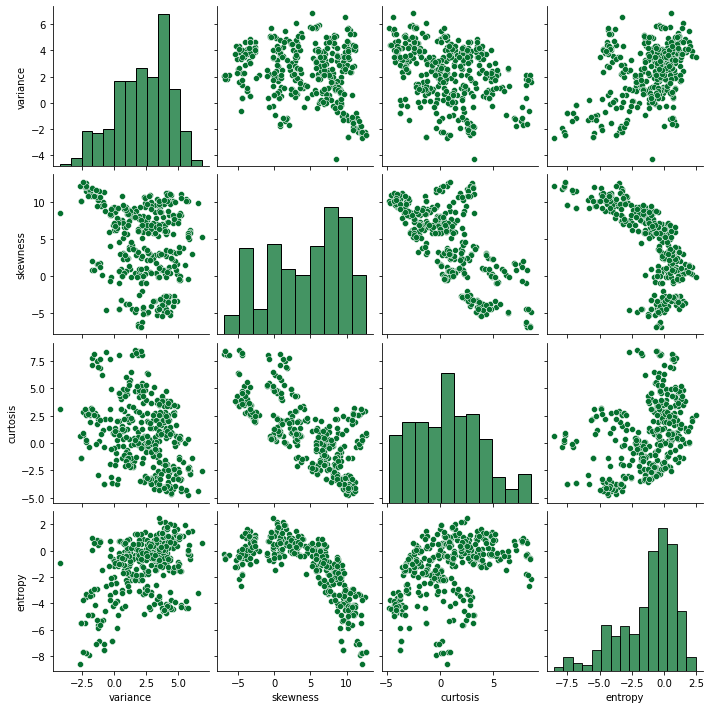

In [18]:
sns.set_palette("Greens_r")
p_good = sns.pairplot(x_train_good[cols])
plt.savefig("good_bills.pdf", format="pdf", bbox_inches="tight")
plt.show()

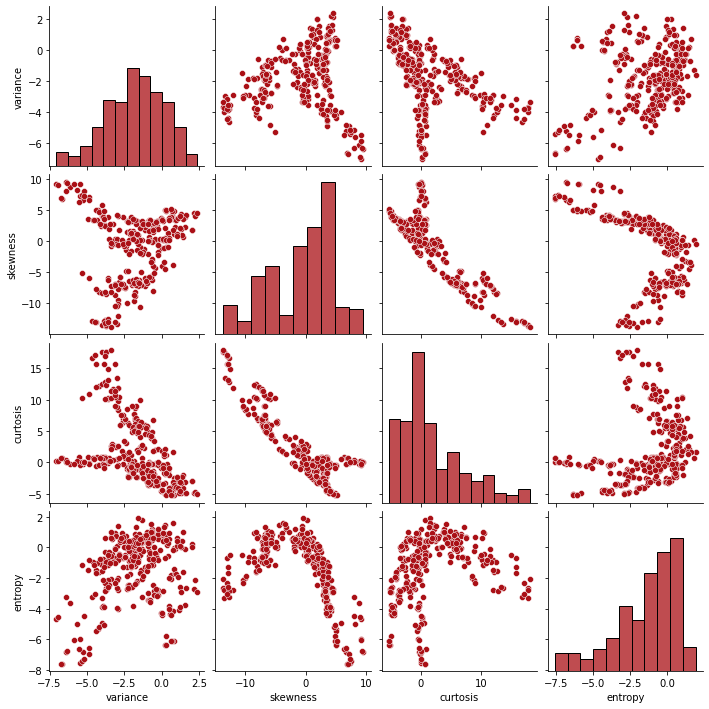

In [19]:
sns.set_palette("Reds_r")
p_bad = sns.pairplot(x_train_bad[cols])
plt.savefig("fake_bills.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [20]:
df[cols].corr()

,variance,skewness,curtosis,entropy
variance,1.000000,0.264026,-0.380850,0.276817
skewness,0.264026,1.000000,-0.786895,-0.526321
curtosis,-0.380850,-0.786895,1.000000,0.318841
entropy,0.276817,-0.526321,0.318841,1.000000


In [21]:
cols_classifier = ['variance', 'skewness', 'curtosis', 'entropy', 'sign']
df_classifier = df[cols_classifier].sample(frac=1, random_state=1)

In [22]:
df_classifier.head(10)

,variance,skewness,curtosis,entropy,sign
1240,-3.5510,1.89550,0.186500,-2.440900,-
703,1.3114,4.54620,2.293500,0.225410,+
821,-4.0173,-8.31230,12.454700,-1.437500,-
1081,-5.1190,6.64860,-0.049987,-6.520600,-
37,3.6289,0.81322,1.627700,0.776270,+
167,1.0235,6.90100,-2.006200,-2.712500,+
223,4.6464,10.53260,-4.585200,-4.206000,+
647,3.7791,2.57620,1.309800,0.565500,+
325,4.4549,2.49760,1.031300,0.968940,+
558,4.3846,-4.87940,3.366200,-0.029324,+


In [23]:
for ind in x_testing.index.tolist():
    var = x_testing.loc[ind]['variance']
    skew = x_testing.loc[ind]['skewness']
    curt = x_testing.loc[ind]['curtosis']
    ent = x_testing.loc[ind]['entropy']
    
    if(var>=0 and skew>=0 and curt<2.5 and ent<0):
        x_testing.at[ind,'classifier']='+'
    else:
        x_testing.at[ind,'classifier']='-'

In [24]:
print(x_testing)

      variance  skewness  curtosis  entropy  class  color sign classifier
9       1.5356   9.17720  -2.27180 -0.73535      0  green    +          +
12      1.8993   7.66250   0.15394 -3.11080      0  green    +          +
14      3.4040   8.72610  -2.99150 -0.57242      0  green    +          +
18      1.4479  -4.87940   8.34280 -2.10860      0  green    +          -
20      5.7867   7.89020  -2.61960 -0.48708      0  green    +          +
...        ...       ...       ...      ...    ...    ...  ...        ...
1363   -1.1667  -1.42370   2.92410  0.66119      1    red    -          -
1365   -4.5046  -5.81260  10.88670 -0.52846      1    red    -          -
1366   -2.4100   3.74330  -0.40215 -1.29530      1    red    -          -
1370   -3.5637  -8.38270  12.39300 -1.28230      1    red    -          -
1371   -2.5419  -0.65804   2.68420  1.19520      1    red    -          -

[686 rows x 8 columns]


In [25]:
confusion = ['TP','TN','FP','FN','Accuracy','TPR','TNR']
df_Confidence = pd.DataFrame(columns = confusion)

temporary = [0,0,0,0]
for ind in x_testing.index.tolist():
    if x_testing.loc[ind]['classifier'] == '+':
        if x_testing.loc[ind]['classifier'] == x_testing.loc[ind]["sign"]:
            temporary[0]+=1
        else:
            temporary[2]+=1
    else:
        if x_testing.loc[ind]['classifier'] == x_testing.loc[ind]["sign"]:
            temporary[1]+=1
        else:
            temporary[3]+=1

TPR = temporary[0]/(temporary[0]+temporary[2])
TNR = temporary[1]/(temporary[1]+temporary[3])
accuracy = (temporary[0]+temporary[1])/(temporary[0]+temporary[1]+temporary[2]+temporary[3])
temporary.append(round(accuracy*100,2))
temporary.append(round(TPR*100,2))
temporary.append(round(TNR*100,2))

df_Confidence.loc[len(df_Confidence.index)] = temporary

In [26]:
# Summarized the findings in the table below

In [27]:
print(df_Confidence)

      TP     TN    FP     FN  Accuracy    TPR    TNR
0  151.0  280.0  28.0  227.0     62.83  84.36  55.23


In [28]:
##Question 3

In [29]:
#knn classifier for the given values of k
no_neighbors = [3, 5, 7, 9, 11]
mse_arr = []
mse = 0.0
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))
df_features = df.iloc[:, 0:4].values
df_labels = df.iloc[:, 4].values 

In [30]:
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_labels, test_size=0.5, random_state=21)

In [31]:
for i, k in enumerate(no_neighbors):
    # Instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to training data
    knn.fit(train_features, train_labels)
    predicted_labels = knn.predict(test_features)
    mse = 1.0 - accuracy_score(test_labels,predicted_labels)
    mse_arr.append(mse)
    print(mse_arr)

[0.001457725947521915]
[0.001457725947521915, 0.0]
[0.001457725947521915, 0.0, 0.0]
[0.001457725947521915, 0.0, 0.0, 0.0]
[0.001457725947521915, 0.0, 0.0, 0.0, 0.002915451895043719]


In [32]:
train_accuracy[i] = knn.score(train_features, train_labels)
test_accuracy[i] = knn.score(test_features, test_labels)
print("Test Accuracy is ",test_accuracy)

Test Accuracy is  [0.         0.         0.         0.         0.99708455]


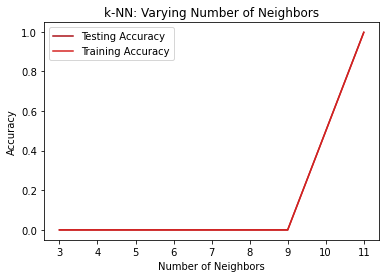

In [33]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Minimum error:- 0.0 at K = 3


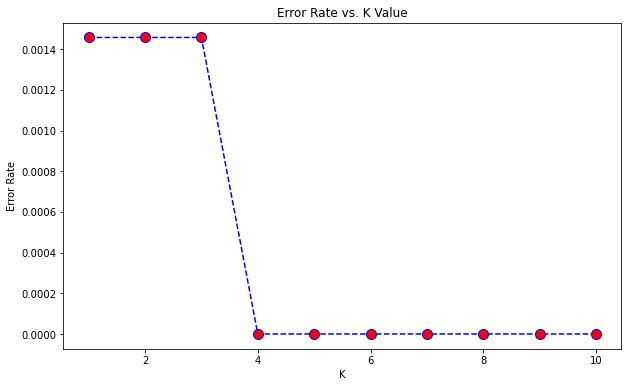

In [34]:
#Optimal value of k
error_rate = []
for i in range(1,11):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_features,train_labels)
 pred_i = knn.predict(test_features)
 error_rate.append(np.mean(pred_i != test_labels))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [35]:
##optimal value k* of k is 3

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(confusion_matrix(test_labels, predicted_labels))
cn_mtrx = confusion_matrix(test_labels, predicted_labels)

[[379   1]
 [  0 306]]


In [37]:
FP = cn_mtrx.sum(axis=0) - np.diag(cn_mtrx) 
FN = cn_mtrx.sum(axis=1) - np.diag(cn_mtrx)
TP = np.diag(cn_mtrx)
TN = cn_mtrx.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)

TNR = TN/(TN+FP) 

ACC = (TP+TN)/(TP+FP+FN+TN)
print(TP, TN, FP, FN, ACC, TPR, TNR)

[379. 306.] [306. 379.] [0. 1.] [1. 0.] [0.99854227 0.99854227] [0.99736842 1.        ] [1.         0.99736842]


In [38]:
#knn classifier is better than the simple classifier

In [39]:
##For BUID as features

In [40]:
#For f1,f2,f3,f4 as BUID values
new_list = [[9, 3, 4, 6]]
new_output = knn.predict(new_list)
print(new_list, new_output)

[[9, 3, 4, 6]] [0]


In [41]:
##The label for this bill is green using optimal value of k

In [ ]:
##Question 4

In [42]:
#Drop feature variance from the dataset
df_drop1 = df.drop(['variance'], axis=1)
print(df_drop1)

      skewness  curtosis  entropy  class  color sign
0      8.66610   -2.8073 -0.44699      0  green    +
1      8.16740   -2.4586 -1.46210      0  green    +
2     -2.63830    1.9242  0.10645      0  green    +
3      9.52280   -4.0112 -3.59440      0  green    +
4     -4.45520    4.5718 -0.98880      0  green    +
...        ...       ...      ...    ...    ...  ...
1367   1.34920   -1.4501 -0.55949      1    red    -
1368  -4.87730    6.4774  0.34179      1    red    -
1369 -13.45860   17.5932 -2.77710      1    red    -
1370  -8.38270   12.3930 -1.28230      1    red    -
1371  -0.65804    2.6842  1.19520      1    red    -

[1372 rows x 6 columns]


In [43]:
df_features = df_drop1.iloc[:, 0:4].values
df_labels = df_drop1.iloc[:, 4].values 
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_labels, test_size=0.5, random_state=21)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(confusion_matrix(test_labels, predicted_labels))
cn_mtrx = confusion_matrix(test_labels, predicted_labels)

[[379   1]
 [  1 305]]


In [44]:
predicted_labels1 = knn.predict(test_features)
acc = accuracy_score(test_labels, predicted_labels1)
print("Accuracy without variance is",acc*100)

Accuracy without variance is 99.70845481049562


In [45]:
#Drop feature skewness from the dataset
df_drop2 = df.drop(['skewness'], axis=1)
print(df_drop2)

      variance  curtosis  entropy  class  color sign
0      3.62160   -2.8073 -0.44699      0  green    +
1      4.54590   -2.4586 -1.46210      0  green    +
2      3.86600    1.9242  0.10645      0  green    +
3      3.45660   -4.0112 -3.59440      0  green    +
4      0.32924    4.5718 -0.98880      0  green    +
...        ...       ...      ...    ...    ...  ...
1367   0.40614   -1.4501 -0.55949      1    red    -
1368  -1.38870    6.4774  0.34179      1    red    -
1369  -3.75030   17.5932 -2.77710      1    red    -
1370  -3.56370   12.3930 -1.28230      1    red    -
1371  -2.54190    2.6842  1.19520      1    red    -

[1372 rows x 6 columns]


In [46]:
df_features = df_drop2.iloc[:, 0:4].values
df_labels = df_drop2.iloc[:, 4].values 
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_labels, test_size=0.5, random_state=21)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(confusion_matrix(test_labels, predicted_labels))
cn_mtrx = confusion_matrix(test_labels, predicted_labels)

[[374   6]
 [  0 306]]


In [47]:
predicted_labels2 = knn.predict(test_features)
acc = accuracy_score(test_labels, predicted_labels2)
print("Accuracy without skewness is",acc*100)

Accuracy without skewness is 99.12536443148689


In [48]:
#Drop feature curtosis from the dataset
df_drop3 = df.drop(['curtosis'], axis=1)
print(df_drop3)

      variance  skewness  entropy  class  color sign
0      3.62160   8.66610 -0.44699      0  green    +
1      4.54590   8.16740 -1.46210      0  green    +
2      3.86600  -2.63830  0.10645      0  green    +
3      3.45660   9.52280 -3.59440      0  green    +
4      0.32924  -4.45520 -0.98880      0  green    +
...        ...       ...      ...    ...    ...  ...
1367   0.40614   1.34920 -0.55949      1    red    -
1368  -1.38870  -4.87730  0.34179      1    red    -
1369  -3.75030 -13.45860 -2.77710      1    red    -
1370  -3.56370  -8.38270 -1.28230      1    red    -
1371  -2.54190  -0.65804  1.19520      1    red    -

[1372 rows x 6 columns]


In [49]:
df_features = df_drop3.iloc[:, 0:4].values
df_labels = df_drop3.iloc[:, 4].values 
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_labels, test_size=0.5, random_state=21)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(confusion_matrix(test_labels, predicted_labels))
cn_mtrx = confusion_matrix(test_labels, predicted_labels)

[[378   2]
 [  0 306]]


In [50]:
predicted_labels3 = knn.predict(test_features)
acc = accuracy_score(test_labels, predicted_labels3)
print("Accuracy without curtosis is",acc*100)

Accuracy without curtosis is 99.70845481049562


In [51]:
#Drop feature entropy from the dataset
df_drop4 = df.drop(['entropy'], axis=1)
print(df_drop4)

      variance  skewness  curtosis  class  color sign
0      3.62160   8.66610   -2.8073      0  green    +
1      4.54590   8.16740   -2.4586      0  green    +
2      3.86600  -2.63830    1.9242      0  green    +
3      3.45660   9.52280   -4.0112      0  green    +
4      0.32924  -4.45520    4.5718      0  green    +
...        ...       ...       ...    ...    ...  ...
1367   0.40614   1.34920   -1.4501      1    red    -
1368  -1.38870  -4.87730    6.4774      1    red    -
1369  -3.75030 -13.45860   17.5932      1    red    -
1370  -3.56370  -8.38270   12.3930      1    red    -
1371  -2.54190  -0.65804    2.6842      1    red    -

[1372 rows x 6 columns]


In [52]:
df_features = df_drop4.iloc[:, 0:4].values
df_labels = df_drop4.iloc[:, 4].values 
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_labels, test_size=0.5, random_state=21)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(confusion_matrix(test_labels, predicted_labels))
cn_mtrx = confusion_matrix(test_labels, predicted_labels)

[[380   0]
 [  0 306]]


In [53]:
predicted_labels4 = knn.predict(test_features)
acc = accuracy_score(test_labels, predicted_labels4)
print("Accuracy without entropy is",acc*100)

Accuracy without entropy is 100.0


In [54]:
#The accuracy increased in all the four casses when compared to the original model 

In [55]:
#The removal of skewness feature contributed most in the loss of accuracy

In [56]:
#The removal of variance and entropy features contributed in the least loss of accuracy